<a href="https://colab.research.google.com/github/flying-bear/kompluxternaya/blob/master/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar: separate the data into *train, validation, and test*) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Task 1
1. Logistic regression assumes linear separability
2. k-NN assumes that inter-class distance for most of the object is smaller than intra-class distance

Let us violate the second assumption but not the first, so that logistic regerssion performs better than k-NN. To do that, let create a duplicate of each dotted-line class member that is closer to its other-class counterpart than to the same-class mebers.

In [0]:
n_samples = 100
class_size = int(n_samples/2)
class_sep = 5
alpha = -0.3
step = 35

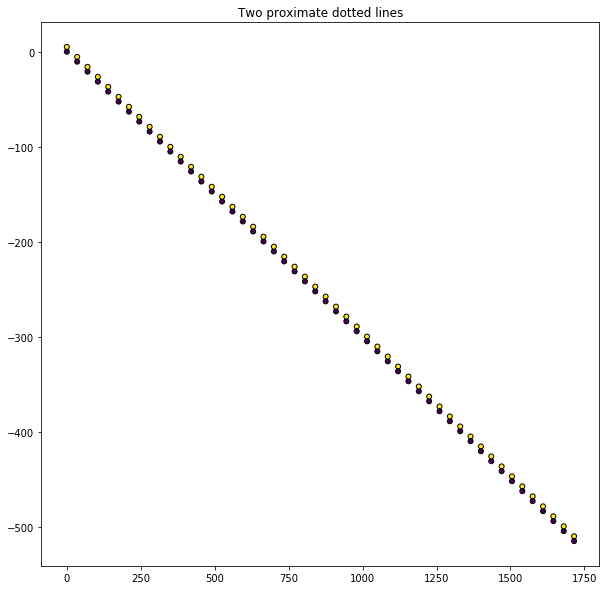

In [141]:
np.random.seed(0)
X_axis = np.array(list(range(0, class_size*step, step)))
Y_axis = alpha * X_axis

Y_axis =  np.append(Y_axis, alpha * X_axis + class_sep)
X_axis = np.append(X_axis, np.array(list(range(0, class_size*step, step))))

y = np.array([0] * class_size + [1] * class_size)

X = np.append([X_axis], [Y_axis, y], axis=0).T

np.random.shuffle(X)

plt.figure(figsize=(10, 10))
plt.title("Two proximate dotted lines", fontsize='large')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, 2],
            s=25, edgecolor='k')

In [0]:
train_ids, test_ids = train_test_split(range(n_samples), test_size=0.3, random_state=42)
y = X[:, 2]
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

In [143]:
neigh = KNeighborsClassifier(n_neighbors=10)
k_range = list(range(1, class_size))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
print(f"best accuracy on validation set: {grid.best_score_}")
best_k = grid.best_params_['n_neighbors']

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train) 
knn_test_score = accuracy_score(y_test, neigh.predict(X_test))
print(f"with best parametr k={best_k}, accuracy on test set: {knn_test_score}")

best accuracy on validation set: 0.5428571428571428
with best parametr k=46, accuracy on test set: 0.43333333333333335


In [144]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
param_grid = {'tol': [1.e-1, 1.e-2, 1.e-3, 1.e-4, 1.e-5], 
              'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
print(f"best accuracy on validation set: {grid.best_score_}")

best_params = grid.best_params_
C = best_params["C"]
tol = best_params["tol"]
clf = LogisticRegression(random_state=0, solver='lbfgs', C=C, tol=tol)
clf.fit(X_train, y_train) 
clf_test_score = accuracy_score(y_test, clf.predict(X_test))
print(f"with best parametr C={C} and tolerance={tol}, accuracy on test set: {clf_test_score}")

best accuracy on validation set: 1.0
with best parametr C=0.1 and tolerance=0.1, accuracy on test set: 1.0


In [145]:
print(f"results:\nlogistic: {clf_test_score}\nk-NN: {knn_test_score}")

results:
logistic: 1.0
k-NN: 0.43333333333333335


**as we can see, logistic regression is much better than k-NN on this dataset (independently of logistic regression parametrs, as the first ones are always taken)**

while k-NN performs worse than chance :(

## Task 2

1. Logistic regression assumes linear separability
2. k-NN assumes that inter-class distance for most of the object is smaller than intra-class distance

Let us violate the first assumption, but not the second, so that k-NN outperforms logistic regression. To do that, for exampe, we can make concentruic circles, which, of course, are not linearly separable.

In [0]:
n_samples = 100
noise = 0.001

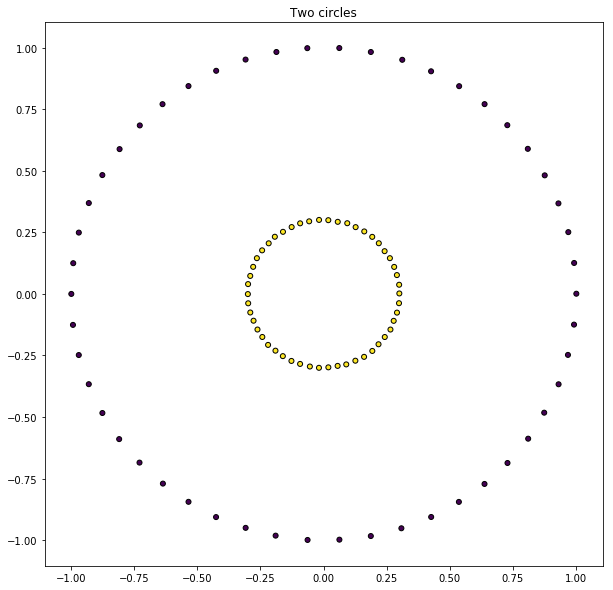

In [147]:
X, y = make_circles(n_samples=n_samples, factor=0.3, noise=noise)
plt.figure(figsize=(10, 10))
plt.title("Two circles", fontsize='large')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [0]:
train_ids, test_ids = train_test_split(range(n_samples), test_size=0.3, random_state=42)
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

In [150]:
neigh = KNeighborsClassifier(n_neighbors=10)
k_range = list(range(1, class_size))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
print(f"best accuracy on validation set: {grid.best_score_}")
best_k = grid.best_params_['n_neighbors']

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train) 
knn_test_score = accuracy_score(y_test, neigh.predict(X_test))
print(f"with best parametr k={best_k}, accuracy on test set: {knn_test_score}")

best accuracy on validation set: 1.0
with best parametr k=1, accuracy on test set: 1.0


In [149]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
param_grid = {'tol': [1.e-1, 1.e-2, 1.e-3, 1.e-4, 1.e-5], 
              'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
print(f"best accuracy on validation set: {grid.best_score_}")

best_params = grid.best_params_
C = best_params["C"]
tol = best_params["tol"]
clf = LogisticRegression(random_state=0, solver='lbfgs', C=C, tol=tol)
clf.fit(X_train, y_train) 
clf_test_score = accuracy_score(y_test, clf.predict(X_test))
print(f"with best parametr C={C} and tolerance={tol}, accuracy on test set: {clf_test_score}")

best accuracy on validation set: 0.6428571428571429
with best parametr C=100 and tolerance=0.1, accuracy on test set: 0.5


In [151]:
print(f"results:\nk-NN: {knn_test_score}\nlogistic: {clf_test_score}")

results:
k-NN: 1.0
logistic: 0.5


**as we can see, k-NN performs much better than logistic regression  on this dataset (independently of logistic regression parametrs, as the first one is always taken)**

while logistic regression performs exactly like chance

## Task 3
1. Cosine distance is large when vectors, that correspond to dots, are spread far apart.
2. Euclidian distance is large when the dots are far apart.

Let us violate the second assumption, but not the first, so that cosine k-NN outperforms euclidian k-NN. To do that, let us make all the datapoints of one class be on one vector, so that the euclidian distance is zero, and the other class normally scattered around.

In [0]:
n_samples = 100
class_size = int(n_samples/2)
class_sep = 5
step = 10

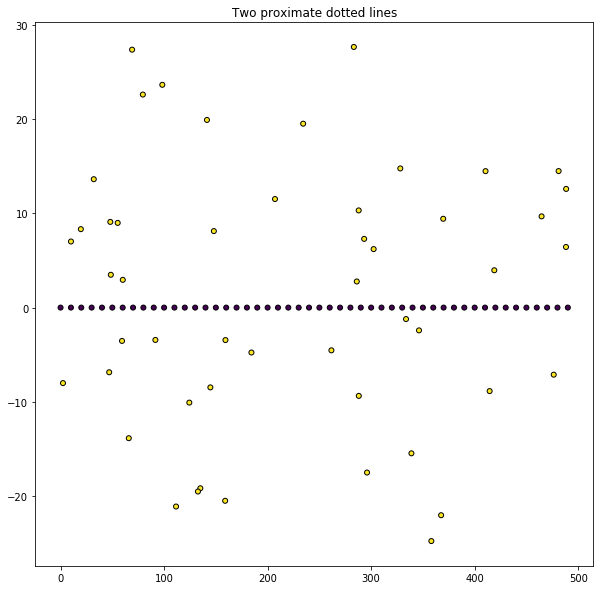

In [154]:
np.random.seed(0)
X_axis = np.array(list(range(0, class_size*step, step)))
Y_axis = np.array([0]*class_size)

Y_axis =  np.append(Y_axis, step * np.random.normal(size=int(class_size/2)) + class_sep)
Y_axis =  np.append(Y_axis, step * np.random.normal(size=int(class_size/2)) - class_sep)
X_axis = np.append(X_axis, np.random.uniform(0, step*class_size, size=class_size))

y = np.array([0] * class_size + [1] * class_size)

X = np.append([X_axis], [Y_axis, y], axis=0).T

np.random.shuffle(X)

plt.figure(figsize=(10, 10))
plt.title("Two proximate dotted lines", fontsize='large')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, 2],
            s=25, edgecolor='k')

In [0]:
train_ids, test_ids = train_test_split(range(n_samples), test_size=0.3, random_state=42)
y = X[:, 2]
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

k_range = list(range(1, class_size, int(class_size/10)))

In [156]:
neigh = KNeighborsClassifier(n_neighbors=10,  metric="euclidean")
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
print(f"best accuracy on validation set: {grid.best_score_}")
best_k = grid.best_params_['n_neighbors']

neigh = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
neigh.fit(X_train, y_train) 
knn_euc_test_score = accuracy_score(y_test, neigh.predict(X_test))
print(f"with best parametr k={best_k}, accuracy on test set: {knn_euc_test_score}")

best accuracy on validation set: 0.5428571428571428
with best parametr k=36, accuracy on test set: 0.43333333333333335


In [157]:
neigh = KNeighborsClassifier(n_neighbors=10,  metric="cosine")
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy', iid=True)
grid.fit(X_train, y_train)
print(f"best accuracy on validation set: {grid.best_score_}")
best_k = grid.best_params_['n_neighbors']

neigh = KNeighborsClassifier(n_neighbors=best_k, metric="cosine")
neigh.fit(X_train, y_train) 
knn_cos_test_score = accuracy_score(y_test, neigh.predict(X_test))
print(f"with best parametr k={best_k}, accuracy on test set: {knn_cos_test_score}")

best accuracy on validation set: 0.9714285714285714
with best parametr k=1, accuracy on test set: 1.0


In [158]:
print(f"results:\ncosine k-NN: {knn_cos_test_score}\neuclidian k-NN: {knn_euc_test_score}")

results:
cosine k-NN: 1.0
euclidian k-NN: 0.43333333333333335


**as we can see, cosine k-NN performs much better than euclidian k-NN on this dataset (independently of cosine k-NN parametrs, as the first one is always taken)**
while euclidian k-NN performs worse than chance :(